## TP3 - Machine Learning
#### Author: Adam HAISSOUBI-VOGIER
#### 4AFISA - GitHub Repo

## Première partie du TP : Découverte et analyse des données

In [15]:
"""
Ce code a été rédigé sur Visual Studio Code version MacOS Silicon, et il est possible que des erreurs de chargement
puissent survenir lors du lancement sur un Jupyter NoteBook ou avec l'extension intégrant cet outil

La dernière partie du TP n'a pas pu être traitée (manque de temps), merci d'en tenir compte

Auteur: Adam HAISSOUBI-VOGIER (4AFISA)
Dernière modification: 19/03/2023 18:56:23

* Ce notebook est intégré et lié à un repository GitHub personnel, le lien est directement disponible à la première 
page du compte-rendu PDF.
** Tout le code implémenté a été commenté pour aider à la compréhension
"""
# première étape : on importe la fonction load_digits, disponible depuis la bibliothèque sklearn.datasets
from sklearn.datasets import load_digits
# on importe également la lib numpy, essentielle pour la manipulation et le stockage des données
import numpy as np
# matplotlib va nous permettre de créer des graphiques -> très utile !!
import matplotlib.pyplot as plt
# on importe aussi la lib sklearn pour réaliser des calculs et modèles pour l'apprentissage supervisé (ou non)
from sklearn.model_selection import train_test_split
#on importe la classe gérant le réseau neuronal multi-couche (MLPClassfier) depuis la lib sklearn
from sklearn.neural_network import MLPClassifier
# on importe la lib de typage (c'est plus joli)
from typing import Any, Union, Optional
# on importe la fonction de validation pour la partie de cross-validation
from sklearn.model_selection import validation_curve
# on importe le module metrics pour le tracer de matrice de confusion
from sklearn import metrics
# on importe la classe gérant l'algo des K-PPV (cross-validation)
from sklearn.neighbors import KNeighborsClassifier
# on importe la classe KFold pour la cross-validation
from sklearn.model_selection import KFold

# on charge le jeu de données digits -> variable globale
GLOBAL_DIGITS = load_digits()

# extraire les données d'images des chiffres manuscrits et les stocker dans la variable X
X = GLOBAL_DIGITS.data

# extraire les étiquettes (labels) correspondantes pour chaque image et les stocker dans la variable y
y = GLOBAL_DIGITS.target

In [16]:
# on importe la lib collections pour utiliser la classe Counter
# cette classe va nous permettre de compter les éléments d'une liste/dict 
# et leur récurrence
import collections
from collections import Counter


# on définit une loop qui va de 0 à 10 (il y a 10 chiffres manuscrits)
__loop_: Any = range(0,10)
tags_count_registry: Counter = collections.Counter(y)
print(tags_count_registry[i] for i in __loop_)
# On affiche l'ensemble des données dans une chaine de caractère multiligne formatée
print(f'''
Data summary:
->X counter: {np.shape(X)}
->y counter: {np.shape(y)}
->Items count for tags: {np.unique(y)}
''')


<generator object <genexpr> at 0x127b51f20>

Data summary:
->X counter: (1797, 64)
->y counter: (1797,)
->Items count for tags: [0 1 2 3 4 5 6 7 8 9]



<Figure size 640x480 with 0 Axes>

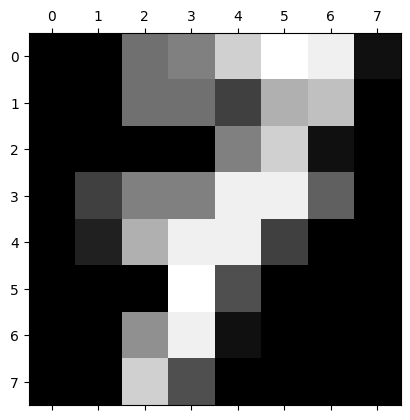

In [17]:
'''Affichage d'une image issue des données 
On aimerait affiche un numéro 7
-> Dispo dans le compte-rendu'''

# utilise plt alias de matplotlib
plt.gray()
# on affiche un numéro voulu récupéré depuis les données globales
plt.matshow(GLOBAL_DIGITS.images[7])
# on affiche l'image
plt.show()

In [18]:
# on divise les données en base d'apprentissage (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=1)

## Deuxième partie du TP : Apprentissage de mon modèle

/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: 

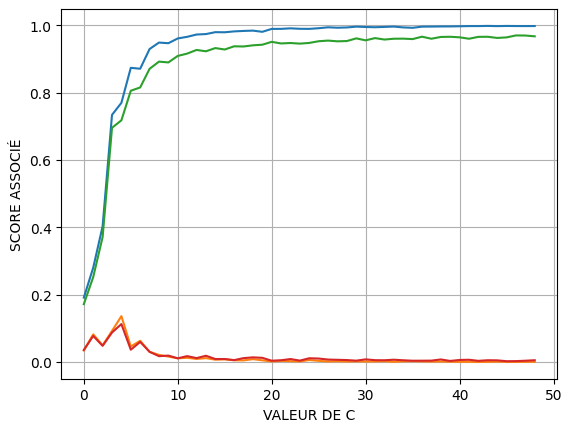

In [19]:
# Ici, on va definir un learning rate initial, que l'on va utiliser directement dans notre futur
# modèle neuronal (ce sera un paramètre tout comme les 2 prochaines variables )
A: Union[int, float] = 0.01
#epoch
B: Union[int, float] = 100

# on définit des listes vides qui vont accueillir divers données : 
# -> les moyennes et std des calculs sur apprentissage et test
ACC_TRAINING_MEAN_LIST: list = [] # moyennes apprentissage
ACC_TRAINING_STD_LIST: list = [] # std apprentissage
ACC_TEST_MEAN_LIST: list = [] # moyennes test
ACC_TEST_STD_LIST: list = [] # std test

ACTIVATION: str = 'tanh'
SOLVER: str = 'adam'
LEARNING_RATE: str = 'adaptive'

__loop_ = range(1, 50)

# On veut tester les différentes valeurs pour C (défini par la var x)
# pour chaque x on teste dans MLPClassifier
# et pour chaque itération , on entraine plusieurs fois (7) le modèle
for x in __loop_ :
    #hidden layer size
    ACC_TRAIN, ACC_TEST = [], []
    __new_loop: Any = range(7)
    for y in __new_loop:
        # on crée le modèle neuronal multi-couche
        CLASSIFIER: MLPClassifier = MLPClassifier(hidden_layer_sizes=x, activation=ACTIVATION, solver=SOLVER, learning_rate_init=A, 
                    max_iter=B, learning_rate=LEARNING_RATE, shuffle=True, batch_size=len(y_train))
        CLASSIFIER.fit(X_train, y_train)
        # on calcule le score puis on l'enregistre dans la liste associée (train)
        ACC_TRAIN.append(CLASSIFIER.score(X_train, y_train))
        # on calcule le score puis on l'enregistre dans la liste associée (test)
        ACC_TEST.append(CLASSIFIER.score(X_test, y_test))
    # ensuite, pour chaque liste contenant les scores des précédentes itérations, on calcule mean + std
    # on enregistre les résultats finaux dans les listes associées
    ACC_TRAINING_MEAN_LIST.append(np.mean(ACC_TRAIN))
    ACC_TRAINING_STD_LIST.append(np.std(ACC_TRAIN))
    ACC_TEST_MEAN_LIST.append(np.mean(ACC_TEST))
    ACC_TEST_STD_LIST.append(np.std(ACC_TEST))

'''Tracé du graphique - matplotlib
On utilise les listes créées contenant les divers données pour tracer nos courbes
'''
plt.plot(ACC_TRAINING_MEAN_LIST)
plt.plot(ACC_TRAINING_STD_LIST)
plt.plot(ACC_TEST_MEAN_LIST)
plt.plot(ACC_TEST_STD_LIST)
# on ajoute une grille
plt.grid()
# on ajoute les labels sur X et Y (ord/abs)
plt.xlabel('VALEUR DE C')
plt.ylabel('SCORE ASSOCIÉ')
plt.show()

In [20]:
# d'après le graphiqye généré, on a une valeur optimale de C pour C=30
# par conséquent, on définit C à 30 ici
C: Union[int, float] = 30
LEARNING_RATE = 'constant'
IS_SHUFFLE: bool = True

# on instancie un deuxième classifieur pour effectuer nos calculs sur C
CLASSIFIER_2: MLPClassifier = MLPClassifier(hidden_layer_sizes=C, activation=ACTIVATION, solver=SOLVER, 
                             learning_rate_init=A,max_iter=B, learning_rate=LEARNING_RATE, shuffle=IS_SHUFFLE, 
                             batch_size=len(y_train))
CLASSIFIER_2.fit(X_train, y_train)

# on récupère la meilleure "loss" pour notre modèle définit sur le nombre de couche cachée optimum
print('BEST LOSS SCORE --> ', CLASSIFIER_2.best_loss_)
# on établit les scores pour la base d'apprentissage et de test
print(CLASSIFIER_2.score(X_train, y_train))
print(CLASSIFIER_2.score(X_test, y_test))

BEST LOSS SCORE -->  0.040466634256569135
0.9960222752585521
0.9740740740740741


/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Troisième partie du TP : Cross-validation ou validation croisée

In [21]:
# Créer un tableau de valeurs allant de 1 à 50 avec un pas de 5
C: Any = np.arange(1, 50, 5)

SCORES_TRAIN_PART, SCORE_VALIDATION_PART = validation_curve(
        MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2), 
        X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2)

In [22]:
# on recrée deux nouvelles listes pour enregistrer nos scores calculés ci-dessous
TRAIN_MEAN_SCORES: Union[list, Any] = []
TEST_MEAN_SCORES: Union[list[Any], Any] = []
# On crée les deux loops que l'on souhaite utiliser pour nos calculs
__first_loop_: Any = range(len(SCORES_TRAIN_PART))
__second_loop_: Any = range(len(SCORE_VALIDATION_PART))

# Je définis ici des constantes d'erreur pour le try/catch
ERROR_TRAIN_MEAN_SCORE: str = "(!) - Error during train main score saving loop, please retry...\n"
ERROR_TEST_MEAN_SCORE: str = "(!) - Error during test main score saving loop, please retry...\n"
# Calcul des scores...
for index in __first_loop_:
    try:
        TRAIN_MEAN_SCORES.append(np.mean(SCORES_TRAIN_PART[index]))
    except (IndentationError, IndexError, OSError) as _e:
        print(f'''{_e.__class__.__name__} - {ERROR_TRAIN_MEAN_SCORE}''')
for index in __second_loop_:
    try:
        TEST_MEAN_SCORES.append(np.mean(SCORE_VALIDATION_PART[index]))
    except (IndentationError, IndexError, OSError) as _e:
        print(f'''{_e.__class__.__name__} - {ERROR_TEST_MEAN_SCORE}''')

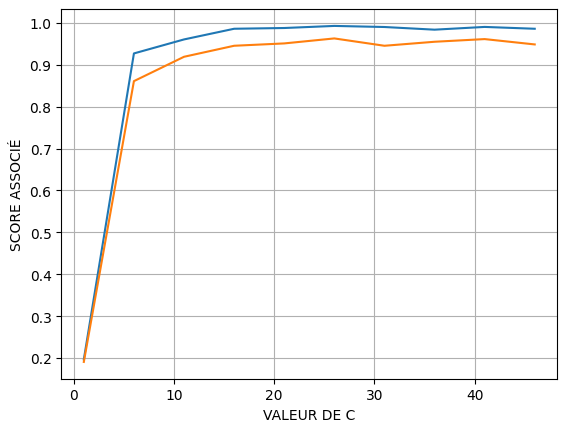

In [23]:
'''Tracé du graphique - matplotlib
On utilise les listes créées contenant les divers 
données pour tracer nos courbes
'''
plt.plot(C, TRAIN_MEAN_SCORES)
plt.plot(C, TEST_MEAN_SCORES)
# Ajout de la grille...
plt.grid()
# Ajout des labels pour X et Y (ord/abs)
plt.xlabel('VALEUR DE C')
plt.ylabel('SCORE ASSOCIÉ')
# Affichage du graphique
plt.show()

In [24]:
# On définit un nouveau modèle neuronal multi-couche
CLASSIFIER_3: MLPClassifier = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', learning_rate_init=A,max_iter=B, learning_rate='constant', shuffle=True, batch_size=len(y_train))
CLASSIFIER_3.fit(X_train, y_train)
# Comme précédemment on établit les scores et 'best loss'
print('BEST LOSS SCORE -->', CLASSIFIER_3.best_loss_) # output 1
print(CLASSIFIER_3.score(X_train, y_train)) # ouput 2
print(CLASSIFIER_3.score(X_test, y_test)) # output 3

BEST LOSS SCORE --> 1.6359083980569107
0.2609387430389817
0.23703703703703705


/Library/Python/3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


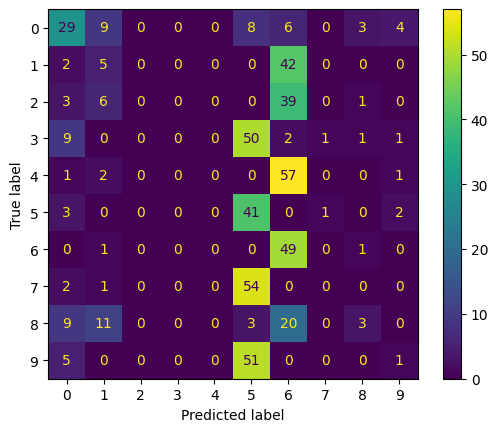

In [44]:
Y_PRED_TEST_PART: Any = CLASSIFIER_3.predict(X_test)
# On trace la matrice de confusion basée sur la modèle entrainé et implementé précédemment
# On utilise la base de test et les predictions faites par le troisème classifieur que j'ai implementé
metrics.ConfusionMatrixDisplay.from_predictions(y_test, Y_PRED_TEST_PART)

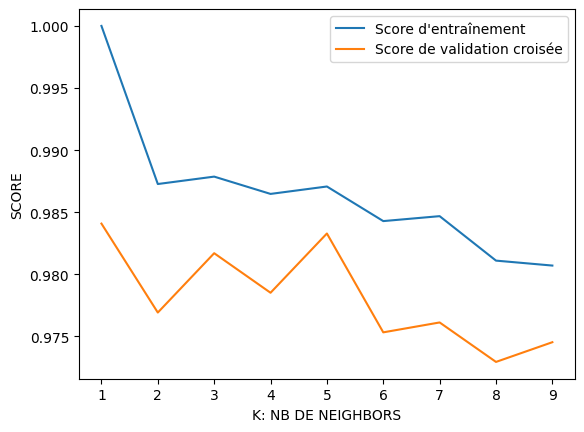

In [26]:

# On définit ici les valeurs à tester en input pour la variation de k
PARAMETERS_RANGE_KNEIGH: Union[list[int], list[float]] = [1,2,3,4,5,6,7,8,9]
# On implémente un classifieur des K-PPV pour l'utiliser dans les prochains calculs
KNEIGH_CLASSIFIER: KNeighborsClassifier = KNeighborsClassifier()

# Comme on fait de la validation croisée, on doit définir le nombre de plis
# On instancie donc un objet KFolds (importé au début du TP)
KFOLD_CURSOR: KFold = KFold(n_splits=5, shuffle=True, random_state=42)

# Pour chaque valeur de K contenue dans PARAMETERS_RANGE_KNEIGH, 
# on calcule d'une part les scores d'entraînement ainsi que les scores
# de validation
KTRAIN_SCORES, KVALIDATION_SCORES = validation_curve(KNEIGH_CLASSIFIER, X_train, y_train, 
                                              param_name='n_neighbors', 
                                              param_range=PARAMETERS_RANGE_KNEIGH, 
                                              cv=KFOLD_CURSOR)

CONSTANT_AXIS: int = 1
CONSTANT_ALPHA: Union[float, int] = 0.2

# Après avoir calculé les scores, on calcules les moyennes et std des scores d'entrainement et de test
# --> pour chaque valeur de k
TRAIN_MEAN_SCORES: Any = np.mean(KTRAIN_SCORES, axis=CONSTANT_AXIS)
TRAIN_STD_SCORES: Any = np.std(KTRAIN_SCORES, axis=CONSTANT_AXIS)
VALID_MEAN_SCORES: Any = np.mean(KVALIDATION_SCORES, axis=CONSTANT_AXIS)
VALID_STD_SCORES: Any = np.std(KVALIDATION_SCORES, axis=CONSTANT_AXIS)


'''Tracé du graphique - matplotlib
On utilise les listes créées contenant les divers 
données pour tracer nos courbes
'''
plt.plot(PARAMETERS_RANGE_KNEIGH, TRAIN_MEAN_SCORES, label='Score d\'entraînement')
plt.plot(PARAMETERS_RANGE_KNEIGH, VALID_MEAN_SCORES, label='Score de validation croisée')
# Affichage e des labels X et Y avec leurs labels respectifs...
plt.xlabel('K: NB DE NEIGHBORS')
plt.ylabel('SCORE')
plt.legend()
# Affichage du graphique final
plt.show()

## Quatrième partie du TP : Les techniques de rejet

In [34]:
# Comme indiqué dans le TP, on récupère le code donné : 
# --> deux fonctions essentielles pour la suite pour tester les
# techniques de rejet
def argmax_reject_threshold(y, threshold):
    """
    """
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))
    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    """
    """
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))
    return y_masked.filled(-1)

/var/folders/30/flkt7q8569z3xnlkns9hxrs00000gn/T/ipykernel_47983/2834651559.py:47: RuntimeWarning: invalid value encountered in scalar divide
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
/var/folders/30/flkt7q8569z3xnlkns9hxrs00000gn/T/ipykernel_47983/2834651559.py:47: RuntimeWarning: invalid value encountered in scalar divide
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
/var/folders/30/flkt7q8569z3xnlkns9hxrs00000gn/T/ipykernel_47983/2834651559.py:47: RuntimeWarning: invalid value encountered in scalar divide
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
/var/folders/30/flkt7q8569z3xnlkns9hxrs00000gn/T/ipykernel_47983/2834651559.py:47: RuntimeWarning: invalid value encountered in scalar divide
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
/var/folders/30/flkt7q8569z3xnlkns9hxrs00000gn/T/ipykernel_47983/2834651559.py:47: RuntimeWarning: invalid value encountered in scalar divide
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
/var/folders/30

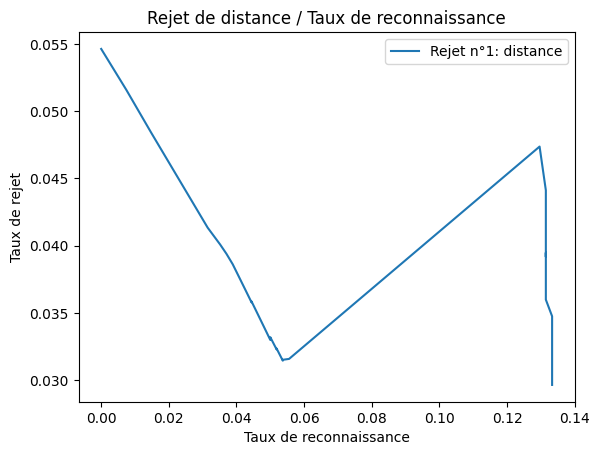

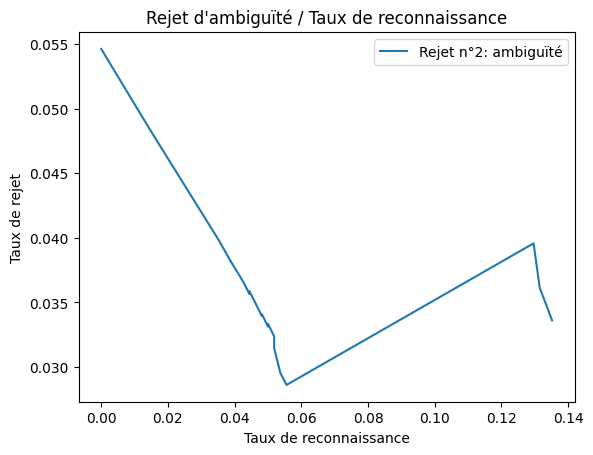

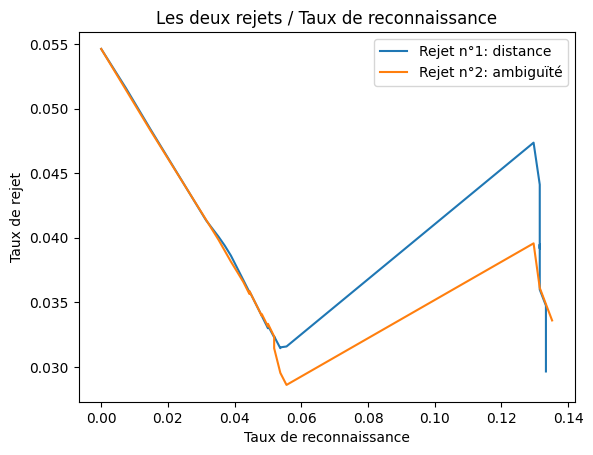

In [39]:
def create_confusion_matrix(y_true, y_pred):
    """
    Calcule la matrice de confusion pour un problème de classification
    Avec:
        y_true : liste de vrais labels (ce qu'on attends des prédictions)
        y_pred : liste de labels prédit par le modèle
    Ce que retourne la fonction:
    => matrice : de dimension nxn (matrice de confusion)
    """
    n_classes = len(np.unique(y_true))
    matrix = np.zeros((n_classes+1, n_classes+1))
    for i in range(n_classes):
        for j in range(n_classes):
            matrix[i, j] = np.sum((y_true == i) & (y_pred == j))
        matrix[i, -1] = np.sum(y_true == i) - np.sum(matrix[i, :-1])
        matrix[-1, i] = np.sum(y_pred == i) - np.sum(matrix[:-1, i])
    matrix[-1, -1] = np.sum((y_pred == -1) & (y_true != -1))
    return matrix

def evaluate_rejection_method(modele: Any, X: Any, y_true: Any, rejet: Any):
    """
    Cette fonction va tout simplement évaluer une méthode de rejet en calculant le 
    taux de reconnaissance et de rejet sur une plage de seuil défini.

    Avec: 
    le modèle : soit le modèle de classification à évaluer
    X : type de tableau de forme (n_échantillons, n_caractéristiques)
        Données d'entrée sur lesquelles prédire.
    y_vrai (défini dans la fonction précédente)
    fonction_de_rejet : appelable
        Une fonction qui prend un tableau de probabilité et un seuil et renvoie
        un tableau d'étiquettes prédites.

    Ce que retourne la fonction : 
    seuils : ce sont les seuils qui ont été évalués.
    reconnaissance_rates : ce sont les taux de reconnaissance pour chaque seuil.
    rejet : ce sont les taux de rejet pour chaque seuil.
    """

    thresholds = np.arange(0, 1.01, 0.01)
    recognition_rates = []
    rejection_rates = []
    for threshold in thresholds:
        y_pred = rejet(modele.predict_proba(X), threshold)
        matrix = create_confusion_matrix(y_true, y_pred)
        recognition_rate = np.sum(np.diag(matrix[:-1,:-1])) / np.sum(matrix[:-1,:])
        rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
        recognition_rates.append(recognition_rate)
        rejection_rates.append(rejection_rate)
    return thresholds, recognition_rates, rejection_rates

# On appelle la fonction de calcul des taux de rejet et de reconnaissance pour les deux
# types de rejets: distance et ambiguité
# Cela va nous permettre de créer deux graphes différents afin de comparer

taux, taux_reconnaissance_rejet_distance, taux_rejet_distance = evaluate_rejection_method(CLASSIFIER_3, 
                                                                                          X_test, 
                                                                                          y_test, 
                                                                                          argmax_reject_threshold
                                                                                          ) # GRAPHE 1
taux, taux_reconnaissance_rejet_ambiguite, taux_rejet_ambiguite = evaluate_rejection_method(CLASSIFIER_3, 
                                                                                            X_test, 
                                                                                            y_test, 
                                                                                            argmax_top2_reject_threshold
                                                                                            ) # GRAPHE 2

'''Tracé du graphique - matplotlib
On utilise les listes créées contenant les divers 
données pour tracer nos courbes


Ici, je vais décider de tracer deux graphes : 
-> l'un qui représente le taux de
'''

# GRAPHE 1 -------------------------------------------------

plt.plot(taux_reconnaissance_rejet_distance, 
         taux_rejet_distance, 
         label='Rejet n°1: distance')
plt.xlabel('Taux de reconnaissance')
plt.ylabel('Taux de rejet')
plt.title("Rejet de distance / Taux de reconnaissance")
plt.legend()
plt.show()

# GRAPHE 2 -------------------------------------------------
# Cette partie devrait être commentée pour permettre de voir les deux graphes indépendamment
# Elle peut aussi être laissée telle quelle, cela ne devrait normalement poser aucun soucis
plt.plot(taux_reconnaissance_rejet_ambiguite, 
         taux_rejet_ambiguite, 
         label='Rejet n°2: ambiguïté')
plt.xlabel('Taux de reconnaissance')
plt.ylabel('Taux de rejet')
plt.title("Rejet d'ambiguïté / Taux de reconnaissance")
plt.legend()
plt.show()

# Dans le compte-rendu, un troisième graphe a été créé, combinant les deux premiers. 
# Il reste totalement optionnel, il suffit simplement de décommenter les lignes suivantes :

plt.plot(taux_reconnaissance_rejet_distance, 
         taux_rejet_distance, 
         label='Rejet n°1: distance')
plt.plot(taux_reconnaissance_rejet_ambiguite, 
         taux_rejet_ambiguite, 
         label='Rejet n°2: ambiguïté')
plt.xlabel('Taux de reconnaissance')
plt.ylabel('Taux de rejet')
plt.title("Les deux rejets / Taux de reconnaissance")
plt.legend()
plt.show()



# IMPORTANT : !! Certains graphiques peuvent différer du compte-rendu, le code ayant été lancé hors d'un notebook directement
#               sur un fichier Python Visual Studio Code pour les graphiques du compte-rendu, l'intégration en Notebook 
#               a créé quelques pb notamment sur ce point, du code a du être changé/debuggé et certains graphiques change (je ne
#               sais pas trop pourquoi) !!

## Dernière partie du TP : Cascade de classifieurs